# Packages & Includes

In [ ]:
using Plots
using StatsBase
using LinearAlgebra
using Statistics
using JLD2
using Dates
using LsqFit
using StaticArrays

# data structure module (needs to be module to avoid overwriting local variables in REPL scope)
include("SpinSimParams.jl")
using .SpinSimParams

# function libraries
include("spin_sims.jl");

# Basic Parameters

In [20]:
# interaction
α = 0.13;
ω = 0;

# spin ensemble
nfreq = 10000;

# I gave γ, τ, dt, ψ_0, bw, and ν0 default values since we almost never change them at this point

# lattice parameters
hlk = [1; 1];
θ = [π/2];

# wavevectors
ky = collect(exp10.(LinRange(-3, 1, 8)))
pushfirst!(ky,0)

k = ();
for i = 1:size(ky,1)
    k = (k..., [0; ky[i]]);
end

# make the parameter file
params = make_params(α, ω, nfreq);

# load lattice parameters
params["hlk"] = hlk;
params["θ"] = θ;
params["k"] = k;

# create lattice
@time r, idx_r = make_lattice(params);

# set the variables to loop over
vars = ["k"];
params["vars"] = vars;
params["r"] = r;

  0.257344 seconds (428.00 k allocations: 13.169 MiB)


# Run the Simulation (with spatial distribution)

In [21]:
I, d = make_idx(vars, params)
M_list = Array{Any}(undef, d)

for i in I

    # generate temporary parameters
    tparams = make_temp_params(params, vars, i)

    # simulate
    @time M_list[i] = spin_echo_sim(tparams)

end

# @save "001_M_list.jld2" M_list
# @save "001_parameters.jld2" params

 12.621276 seconds (356.20 M allocations: 20.054 GiB, 18.01% gc time)
 12.834477 seconds (356.20 M allocations: 20.054 GiB, 17.57% gc time)
 12.541128 seconds (356.20 M allocations: 20.054 GiB, 17.46% gc time)
 12.307787 seconds (356.20 M allocations: 20.054 GiB, 17.29% gc time)
 12.325519 seconds (356.20 M allocations: 20.054 GiB, 17.00% gc time)
 12.330213 seconds (356.20 M allocations: 20.054 GiB, 16.85% gc time)
 12.325647 seconds (356.20 M allocations: 20.054 GiB, 16.59% gc time)
 12.274451 seconds (356.20 M allocations: 20.054 GiB, 16.53% gc time)
 12.265997 seconds (356.20 M allocations: 20.054 GiB, 16.30% gc time)


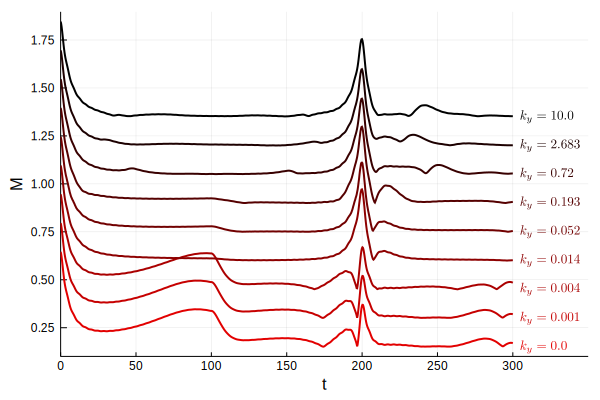

In [60]:
using LaTeXStrings
using Printf
plt1 = plot()

#M_inf = M_list[1]

nM = size(M_list)[1]
for M_idx = 1:nM
    M = M_list[M_idx]
    t = LinRange(0, 300, size(M, 1));
    #y_shift = 0*0.4*(6-var1);
    cidx = (nM-M_idx)/nM
    lc = RGB(cidx,0,0)
    label_h = latexstring("k_y = ", round(params["k"][M_idx][2],digits=3));
    plot!(t, 0.15*M_idx .+ broadcast(abs, M), 
            label="", lw=2,color=lc, legend=:topleft)
    annotate!(305,0.15*M_idx,text(label_h,:left, 9, color=lc))
    #plot!(t,zeros(size(t)) .+ y_shift, color=RGB(0,0,0), linestyle = :dot, label="")
    #plot!(t, broadcast(abs, M_inf),label=string("a = ",α[var1],", w = ",ω[var2],", inf."), lw=2)
end
xaxis!("t")
yaxis!("M")
#title!(string(plot_dim,"D, nS = ",nx*ny*nz,raw", \alpha = ",α,raw", \omega = ",ω))
xlims!(0,350)
#ylims!(0,0.5)
display(plt1);

